In [22]:
import time
import os
import datetime
import matplotlib.pyplot as plt

#from models.segwithskipnet import DenseSegWithSkipNet
from models.segwithskippspmodule import DenseSegWithSkipNet
from loader.cityscapes import CityscapesLoader

import torch

In [23]:
#constants
#load_model_file = "net_epoch_11_steps_4000_loss_<IDK what to add here>_Mar_15_23:14:55.t7"
#load_model_file = "net_epoch_23_steps_8150_loss_<IDK what to add here>_Mar_10_00:42:52.t7"
load_model_file = "net_epoch_31_steps_11150_loss_<IDK what to add here>_Mar_18_02:35:56.t7"
model_name = "SegWithSkipPSPNetpsp"
# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
obj0

NameError: name 'obj0' is not defined

In [ ]:
import pickle
with open('saved_models/SegNet_Dilation/losses_epoch_11_steps_3750_Mar_14_05:27:23.pkl','rb') as f:  # Python 3: open(..., 'rb')
    obj0= pickle.load(f)

maxi = 0
for o in obj0:
    if o[3]['Mean IoU : \t'] > maxi:
        maxi = o[3]['Mean IoU : \t']
        maxo = o
print(maxo)

In [ ]:
import matplotlib.pyplot as plt
iou = []
for o in obj0:
    iou.append(o[3]['Mean IoU : \t'])

plt.plot(iou)
plt.show()

In [24]:
data_loader = CityscapesLoader

t_loader = data_loader(
    "/datasets/cityscapes",
    is_transform=True,
    split="val",
    img_size=(256, 512),
    augmentations=None,
)

Found 500 val images


In [25]:
# n_classes = t_loader.n_classes
n_classes = 20

In [26]:
model = DenseSegWithSkipNet(num_classes=n_classes)
folder = 'saved_models/' + model_name + "/"
model.load_state_dict(torch.load(folder + load_model_file))
model = model.to(device)

In [ ]:
img, labels = t_loader[100]

In [ ]:
model.eval()
outputs = model(img.view([1, 3, 256, 512]))

In [ ]:
pred = outputs.data.max(1)[1].cpu().numpy()

In [ ]:
imgt = img.numpy().transpose([1, 2, 0])

<class 'torch.Tensor'>
1 img
2 gt


/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:2351: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:2423: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


3 pred
<class 'torch.Tensor'>
4 img
5 gt
6 pred


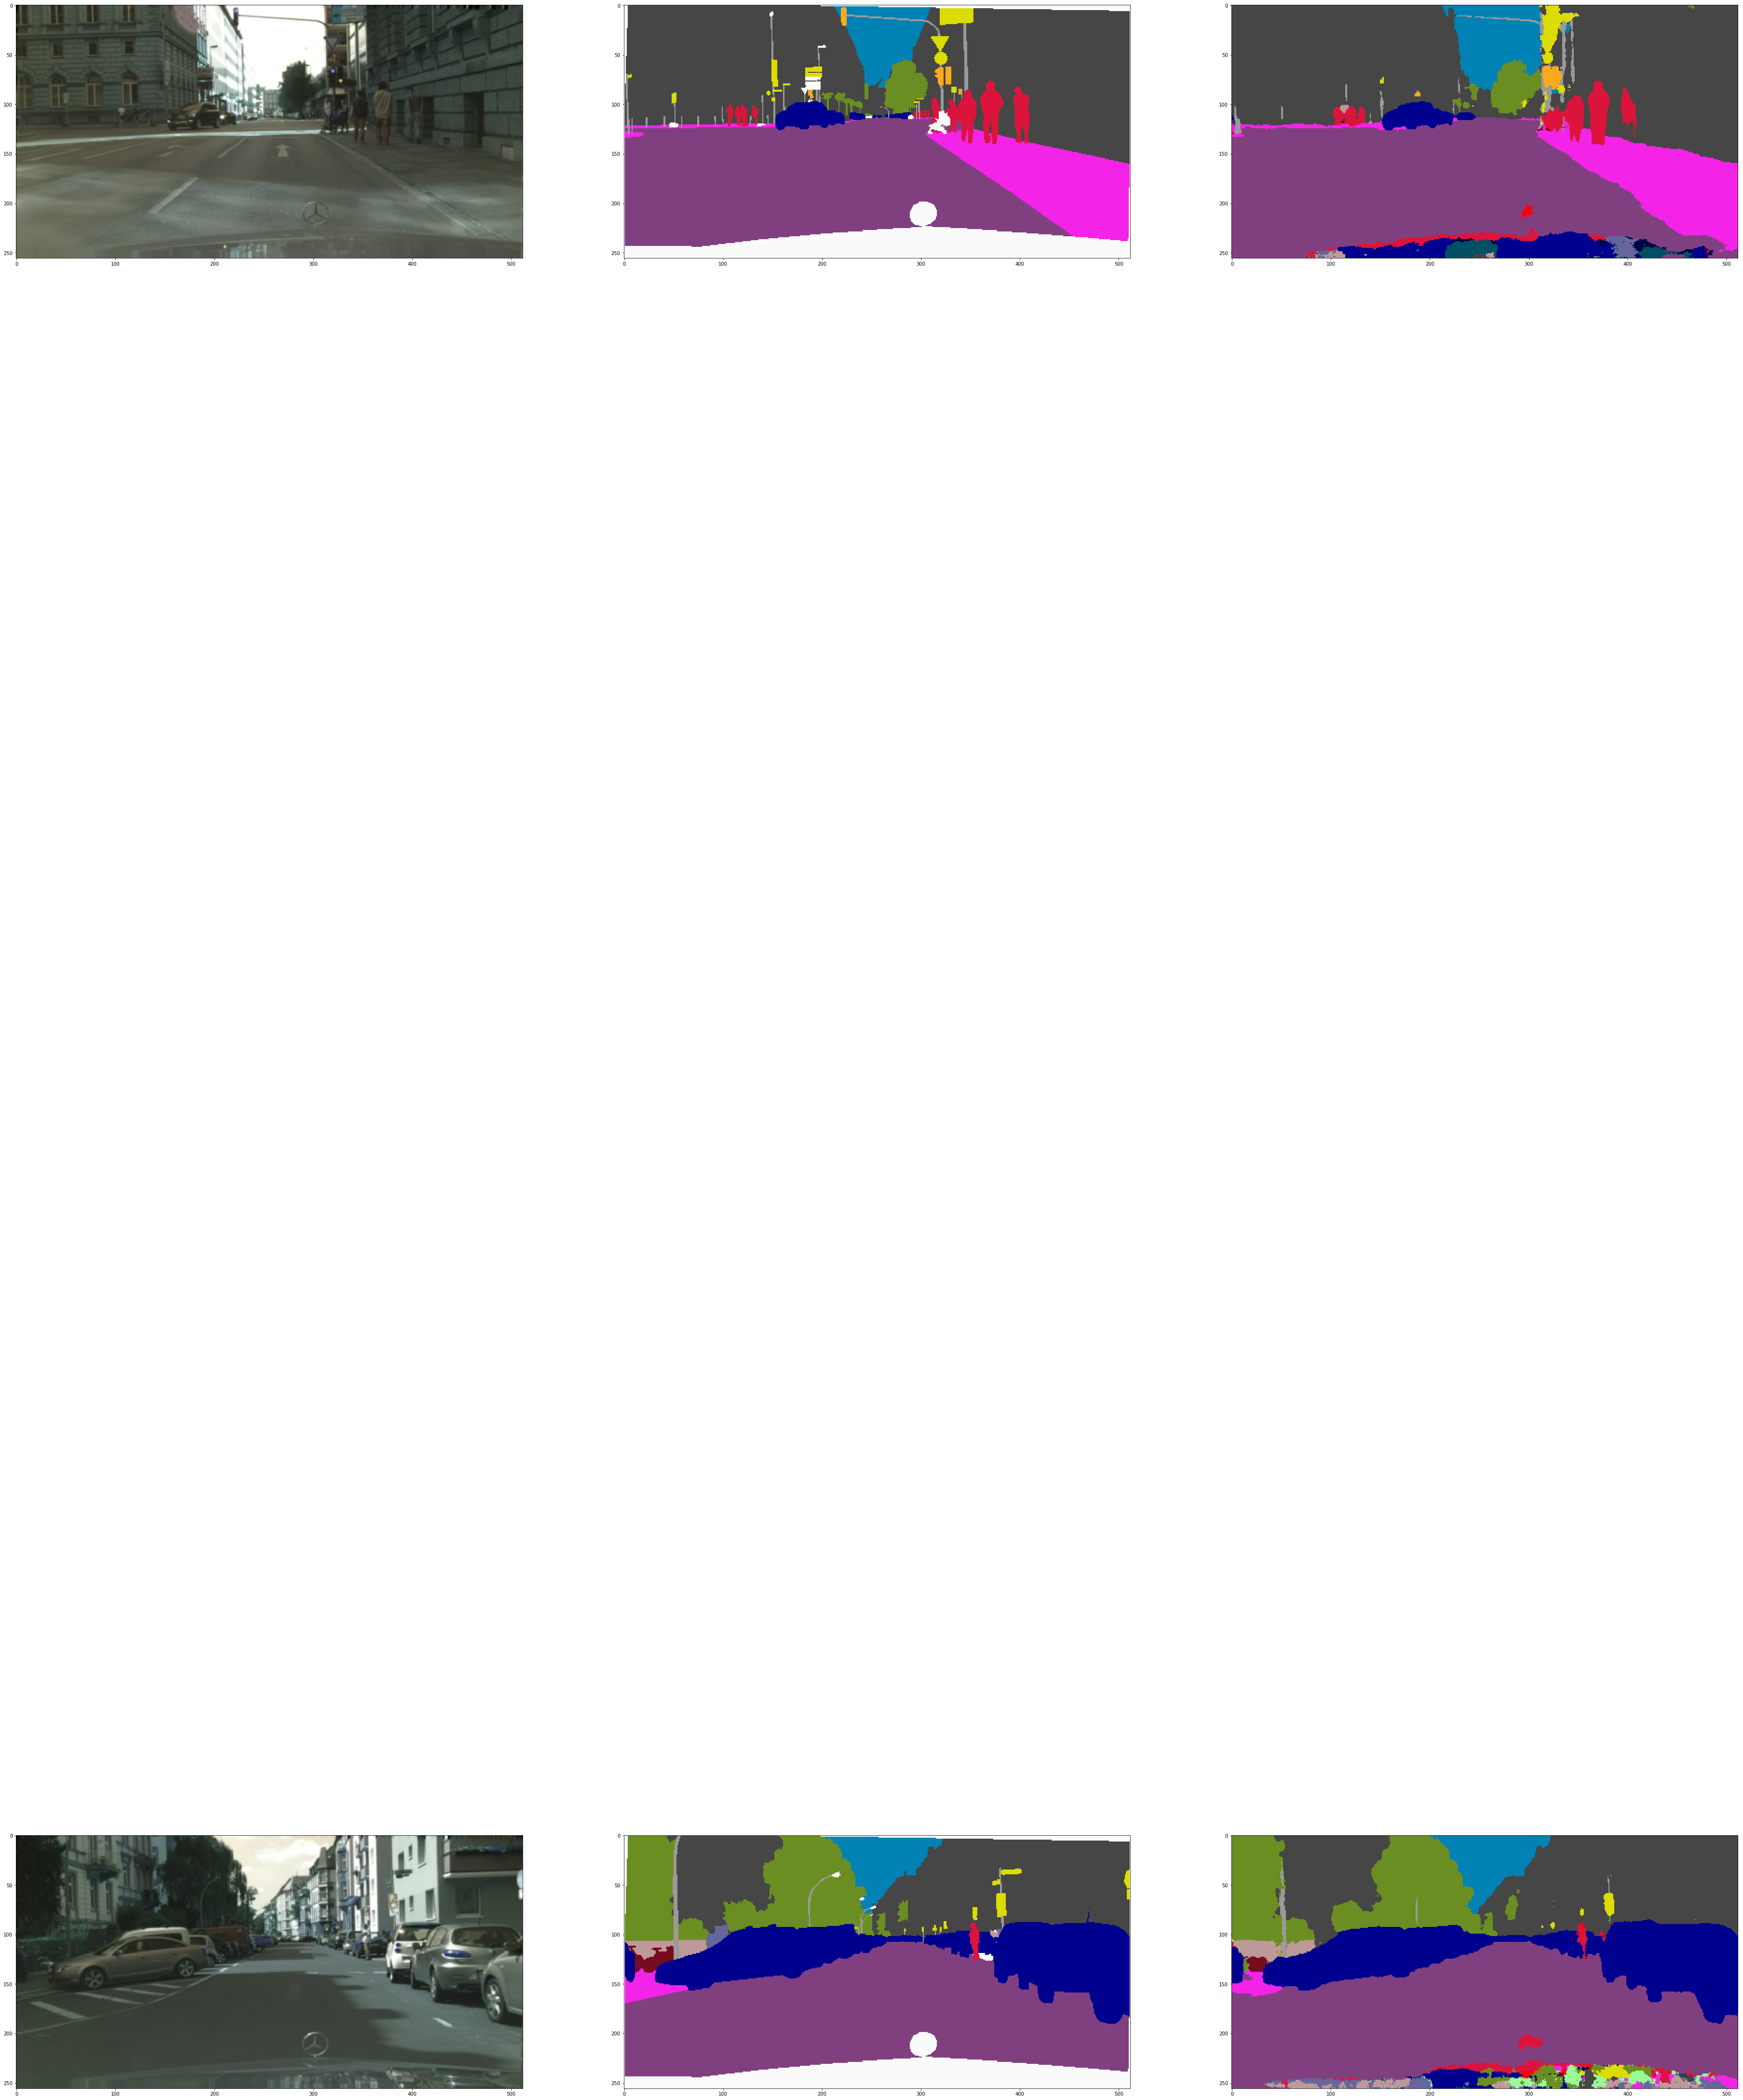

In [30]:

#fig = plt.figure(figsize=(256, 512))
fig = plt.figure(figsize=(64, 128))
columns = 3
rows = 2
ax = []
model.eval()

k = 1
for i in range(rows):
    img, labels = t_loader[i*130+100]
    img = img.to(device)
    labels = labels.to(device)
    print (type(img))
    outputs = model(img.view([1, 3, 256, 512]))
    pred = outputs.max(1)[1].cpu().numpy()
    imgt = img.data.cpu().numpy().transpose([1, 2, 0])
    ax.append( fig.add_subplot(rows, columns, k))
    print(k, 'img')
    
    k += 1
    plt.imshow(imgt)
    gt_img = t_loader.decode_segmap(labels.data.cpu().numpy())
    ax.append( fig.add_subplot(rows, columns, k) )
    print (k, "gt")
    
    k += 1
    plt.imshow(gt_img)
    pred_img = t_loader.decode_segmap(pred.reshape([256, 512]))
    ax.append( fig.add_subplot(rows, columns, k) )
    print (k, "pred")
    k += 1
    plt.imshow(pred_img)
    
#plt.subplots_adjust(wspace=0, hspace=0, left=0, right=0, bottom=0, top=0)
plt.show()

In [ ]:
gt_img = t_loader.decode_segmap(labels.numpy())

In [ ]:
plt.imshow(gt_img)
plt.show()

In [ ]:
gt_img = t_loader.decode_segmap(pred.reshape([256, 512]))
plt.imshow(gt_img)
plt.title("SegNet with Skip Connections")
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

w = 10
h = 10

fig = plt.figure(figsize=(9, 13))
columns = 3
rows = 5

# prep (x,y) for extra plotting
xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
ys = np.abs(np.sin(xs))           # absolute of sine

# ax enables access to manipulate each of subplots
ax = []

for i in range( columns*rows ):
    img = np.random.randint(10, size=(h,w))
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("ax:"+str(i))  # set title
    plt.imshow(img, alpha=0.25)

# do extra plots on selected axes/subplots
# note: index starts with 0
ax[2].plot(x, 3*y)
ax[19].plot(y**2, x)

plt.show()  # finally, render the plot